df 150 df_filtered 120


/tmp/ipykernel_3316253/3742250797.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_lrs = {metric: df_filtered.groupby(['batch', 'drop_out']).apply(best_lr_for_metric, metric=metric) for metric in metrics}
/tmp/ipykernel_3316253/3742250797.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_lrs = {metric: df_filtered.groupby(['batch', 'drop_out']).apply(best_lr_for_metric, metric=metric) for m

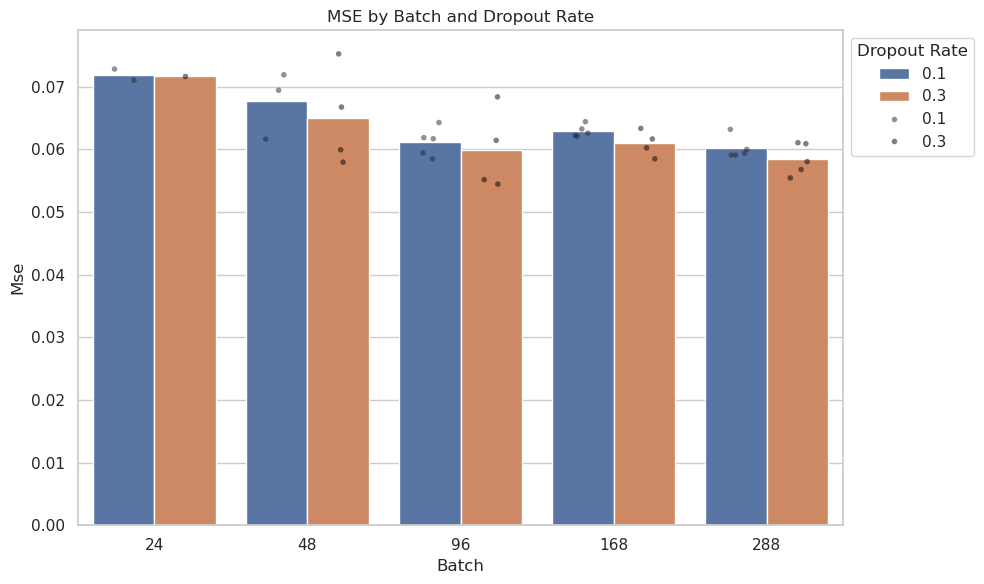

/tmp/ipykernel_3316253/3742250797.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=plot_data[metric], x='batch', y=metric, hue='drop_out', ax=ax, ci=None, estimator=np.mean, palette='deep')
/tmp/ipykernel_3316253/3742250797.py:45: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=plot_data[metric], x='batch', y=metric, hue='drop_out', ax=ax, color='black', jitter=0.15, dodge=True, size=4, alpha=0.5)


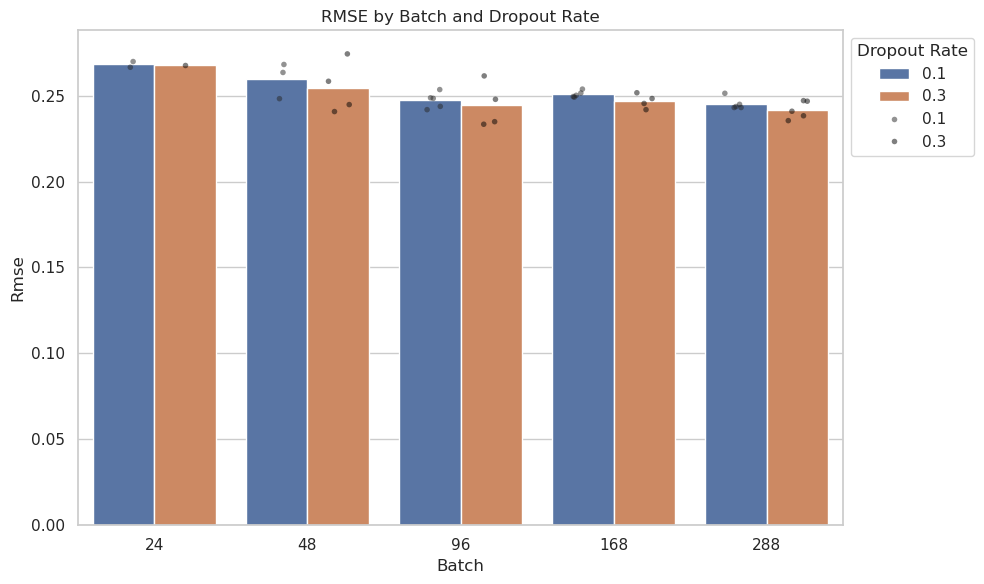

/tmp/ipykernel_3316253/3742250797.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=plot_data[metric], x='batch', y=metric, hue='drop_out', ax=ax, ci=None, estimator=np.mean, palette='deep')
/tmp/ipykernel_3316253/3742250797.py:45: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=plot_data[metric], x='batch', y=metric, hue='drop_out', ax=ax, color='black', jitter=0.15, dodge=True, size=4, alpha=0.5)


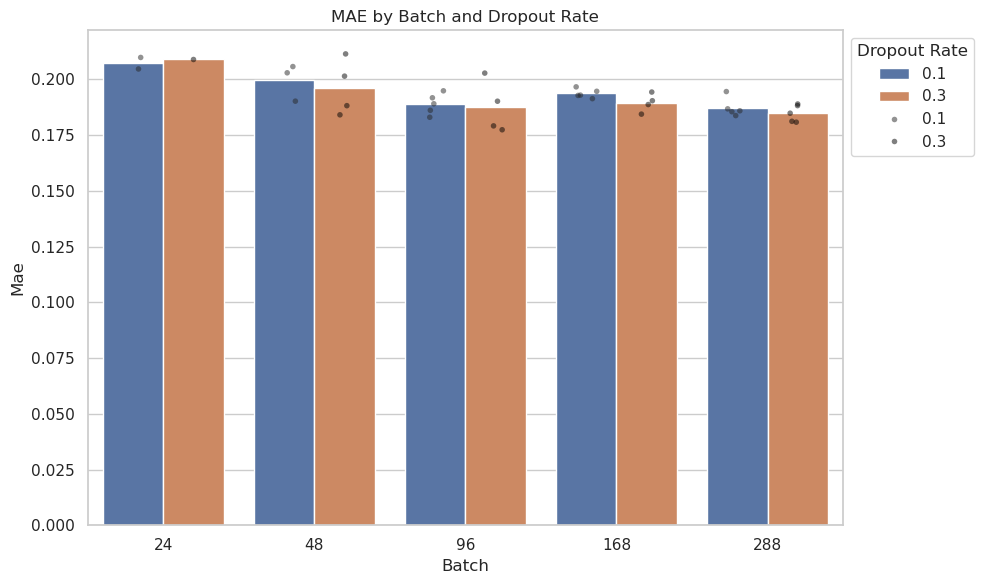

/tmp/ipykernel_3316253/3742250797.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=plot_data[metric], x='batch', y=metric, hue='drop_out', ax=ax, ci=None, estimator=np.mean, palette='deep')
/tmp/ipykernel_3316253/3742250797.py:45: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=plot_data[metric], x='batch', y=metric, hue='drop_out', ax=ax, color='black', jitter=0.15, dodge=True, size=4, alpha=0.5)


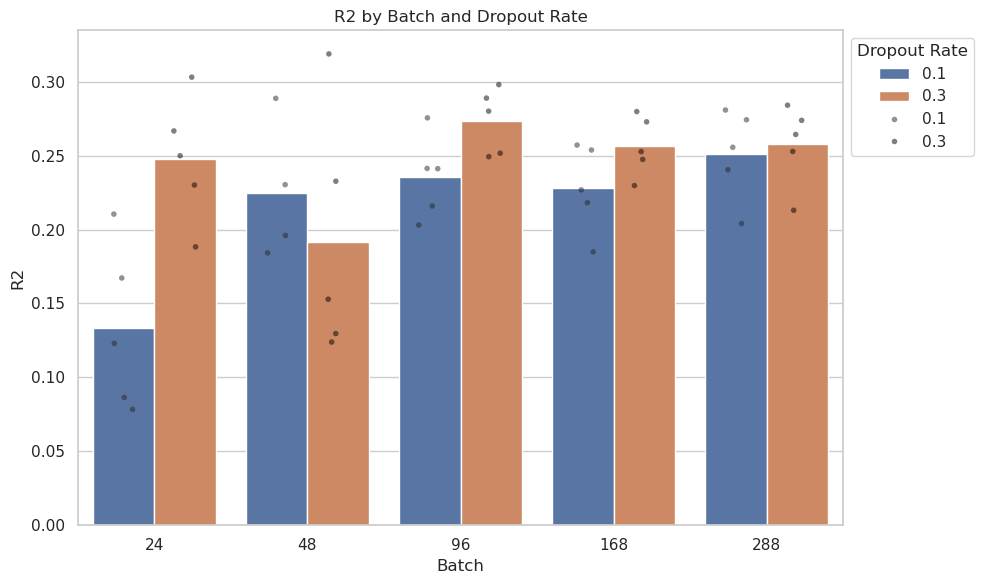

/tmp/ipykernel_3316253/3742250797.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=plot_data[metric], x='batch', y=metric, hue='drop_out', ax=ax, ci=None, estimator=np.mean, palette='deep')
/tmp/ipykernel_3316253/3742250797.py:45: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=plot_data[metric], x='batch', y=metric, hue='drop_out', ax=ax, color='black', jitter=0.15, dodge=True, size=4, alpha=0.5)


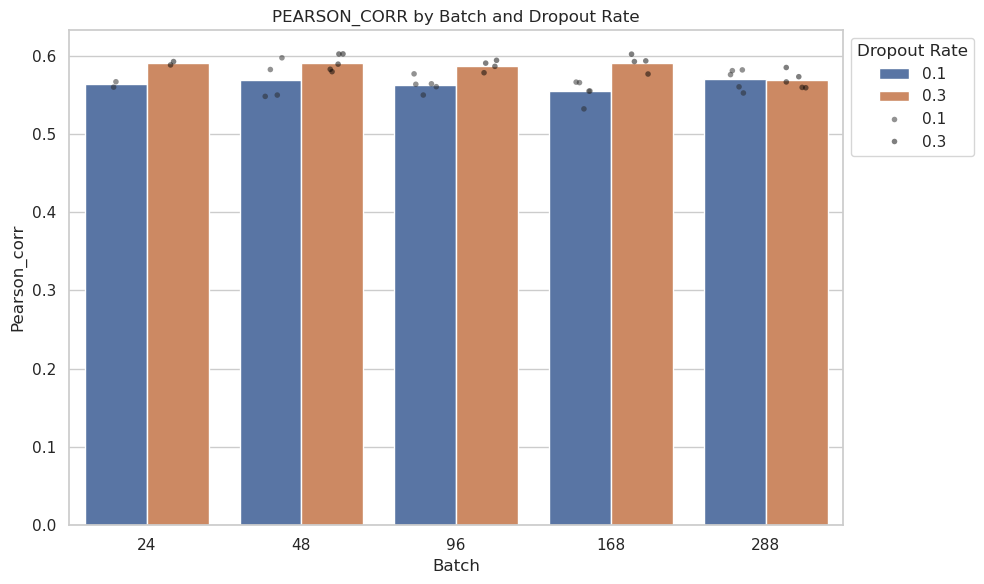

/tmp/ipykernel_3316253/3742250797.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=plot_data[metric], x='batch', y=metric, hue='drop_out', ax=ax, ci=None, estimator=np.mean, palette='deep')
/tmp/ipykernel_3316253/3742250797.py:45: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=plot_data[metric], x='batch', y=metric, hue='drop_out', ax=ax, color='black', jitter=0.15, dodge=True, size=4, alpha=0.5)


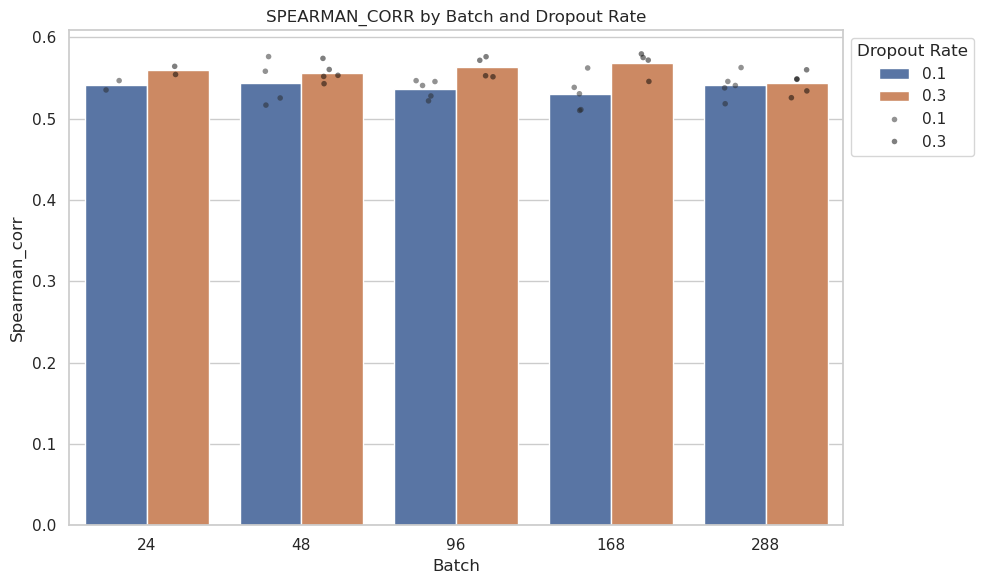

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv('/pmglocal/ty2514/Enhancer/Enhancer/results/ConvNetDeep_R_Square.csv')

# Remove rows where r2 is less than 0.05
df_filtered = df[df['r2'] >= 0.05]
print(f"df {len(df)} df_filtered {len(df_filtered)}")

# Define the metrics and the function to select the best lr
metrics = ['mse', 'rmse', 'mae', 'r2', 'pearson_corr', 'spearman_corr']

# This function will return the best lr for each metric
def best_lr_for_metric(group, metric):
    mean_scores = group.groupby('lr')[metric].mean()
    return mean_scores.idxmax()

# Apply the function for each combination of batch and drop_out for each metric
best_lrs = {metric: df_filtered.groupby(['batch', 'drop_out']).apply(best_lr_for_metric, metric=metric) for metric in metrics}

# Prepare the data for plotting - select rows according to the best lr identified
plot_data = {metric: df_filtered[df_filtered.groupby(['batch', 'drop_out'])['lr'].transform(lambda x: x == best_lrs[metric][(x.name[0], x.name[1])])] for metric in metrics}

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Metrics to be plotted
metrics = ['mse', 'rmse', 'mae', 'r2', 'pearson_corr', 'spearman_corr']

for metric in metrics:
    # Create a new figure for each metric
    plt.figure(figsize=(10, 6))
    ax = plt.gca()  # Get the current Axes instance on the current figure

    # Use barplot to show the mean of each metric grouped by 'batch' and 'drop_out'
    sns.barplot(data=plot_data[metric], x='batch', y=metric, hue='drop_out', ax=ax, ci=None, estimator=np.mean, palette='deep')

    # Use stripplot to add individual points; adjust jitter to ensure points don't overlap too much
    sns.stripplot(data=plot_data[metric], x='batch', y=metric, hue='drop_out', ax=ax, color='black', jitter=0.15, dodge=True, size=4, alpha=0.5)

    # Enhance the legibility of the plot
    ax.set_title(f'{metric.upper()} by Batch and Dropout Rate')
    ax.set_xlabel('Batch')
    ax.set_ylabel(metric.capitalize())
    ax.legend(title='Dropout Rate', loc='upper left', bbox_to_anchor=(1, 1))  # Place the legend outside the plot

    # Adjust the layout
    plt.tight_layout()
    # Show the plot
    plt.show()


In [32]:
plot_data['r2']

,batch,lr,drop_out,seed,mse,rmse,mae,r2,pearson_corr,spearman_corr
2,24,0.00040,0.1,44,0.067950,0.260672,0.199275,0.167247,0.569843,0.542361
5,24,0.00040,0.3,44,0.062820,0.250638,0.190021,0.230124,0.593083,0.557108
8,48,0.00040,0.1,44,0.058036,0.240906,0.182852,0.288753,0.597268,0.576406
10,48,0.00010,0.3,44,0.069124,0.262915,0.204356,0.152859,0.600901,0.566329
13,96,0.00010,0.1,44,0.059112,0.243129,0.184039,0.275562,0.566610,0.536474
16,96,0.00010,0.3,44,0.058022,0.240878,0.182009,0.288917,0.594683,0.572184
20,168,0.00040,0.1,44,0.060887,0.246753,0.188134,0.253808,0.582835,0.562396
22,168,0.00010,0.3,44,0.059333,0.243583,0.186719,0.272855,0.593475,0.559299
24,288,0.00006,0.1,44,0.059217,0.243346,0.187660,0.274270,0.580831,0.553065
28,288,0.00010,0.3,44,0.058414,0.241690,0.182886,0.284117,0.573123,0.548430


df 100, df_filtered 19


/tmp/ipykernel_3316253/3562932209.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_lrs = {metric: df_filtered.groupby('batch').apply(best_lr_for_metric, metric) for metric in metrics}
/tmp/ipykernel_3316253/3562932209.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_lrs = {metric: df_filtered.groupby('batch').apply(best_lr_for_metric, metric) for metric in metrics}
/tmp/ipykernel_3316253/3

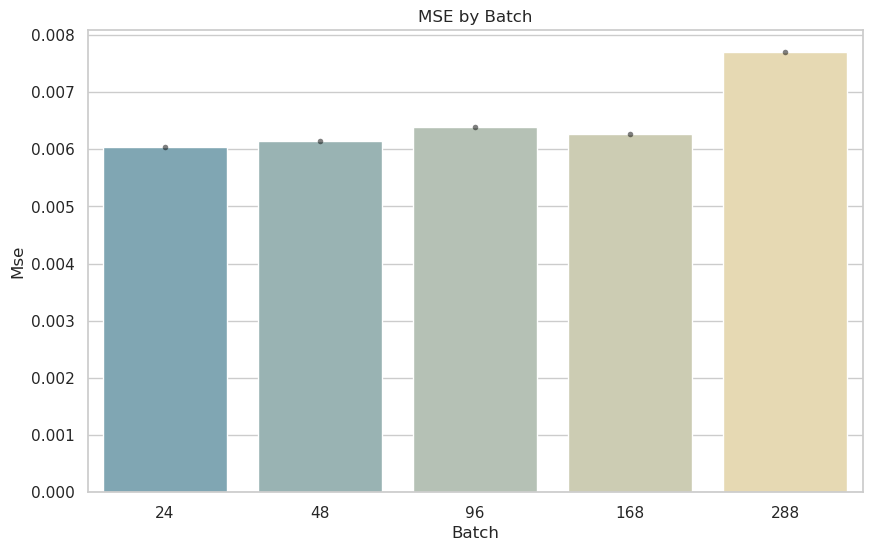

/tmp/ipykernel_3316253/3562932209.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=plot_data[metric], x='batch', y=metric, ci=None, estimator=np.mean, palette='blend:#7AB,#EDA')
/tmp/ipykernel_3316253/3562932209.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data[metric], x='batch', y=metric, ci=None, estimator=np.mean, palette='blend:#7AB,#EDA')


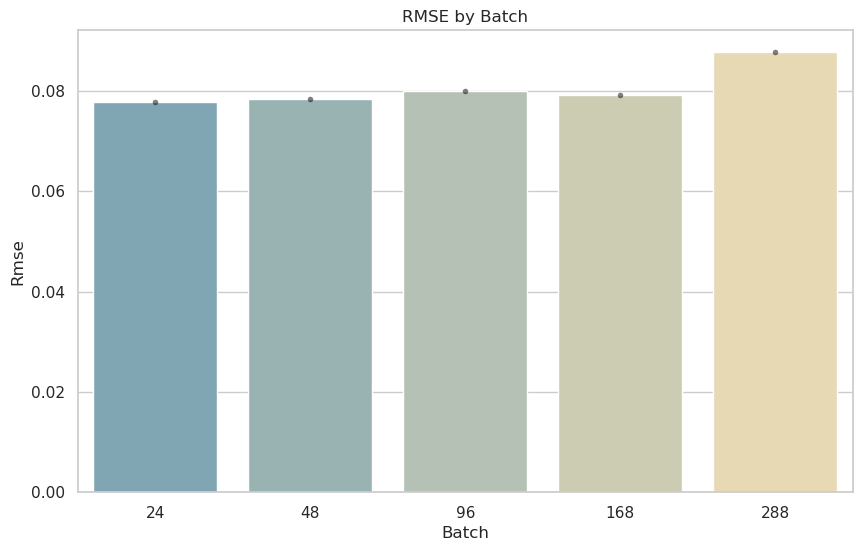

/tmp/ipykernel_3316253/3562932209.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=plot_data[metric], x='batch', y=metric, ci=None, estimator=np.mean, palette='blend:#7AB,#EDA')
/tmp/ipykernel_3316253/3562932209.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data[metric], x='batch', y=metric, ci=None, estimator=np.mean, palette='blend:#7AB,#EDA')


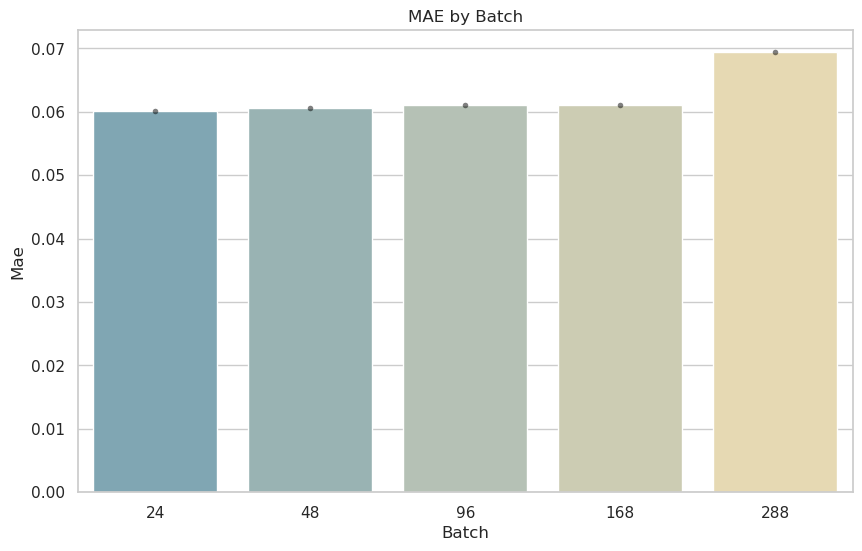

/tmp/ipykernel_3316253/3562932209.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=plot_data[metric], x='batch', y=metric, ci=None, estimator=np.mean, palette='blend:#7AB,#EDA')
/tmp/ipykernel_3316253/3562932209.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data[metric], x='batch', y=metric, ci=None, estimator=np.mean, palette='blend:#7AB,#EDA')


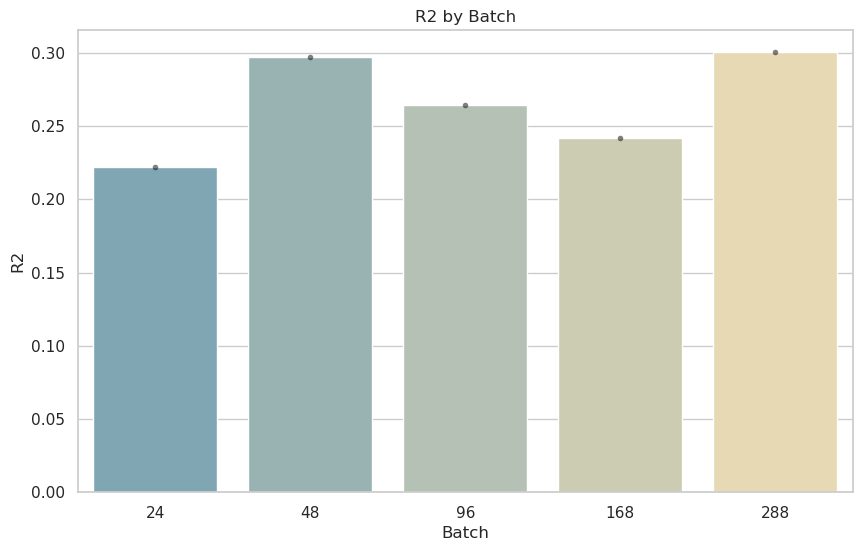

/tmp/ipykernel_3316253/3562932209.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=plot_data[metric], x='batch', y=metric, ci=None, estimator=np.mean, palette='blend:#7AB,#EDA')
/tmp/ipykernel_3316253/3562932209.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data[metric], x='batch', y=metric, ci=None, estimator=np.mean, palette='blend:#7AB,#EDA')


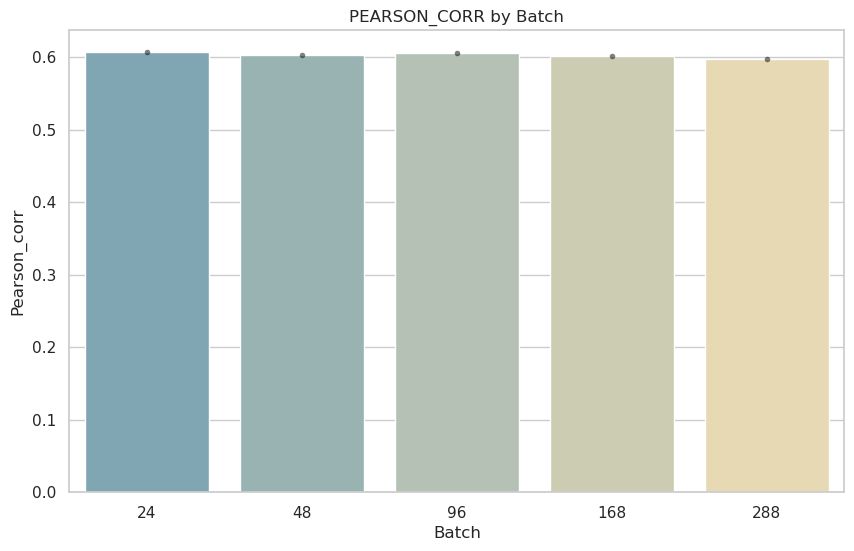

/tmp/ipykernel_3316253/3562932209.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=plot_data[metric], x='batch', y=metric, ci=None, estimator=np.mean, palette='blend:#7AB,#EDA')
/tmp/ipykernel_3316253/3562932209.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data[metric], x='batch', y=metric, ci=None, estimator=np.mean, palette='blend:#7AB,#EDA')


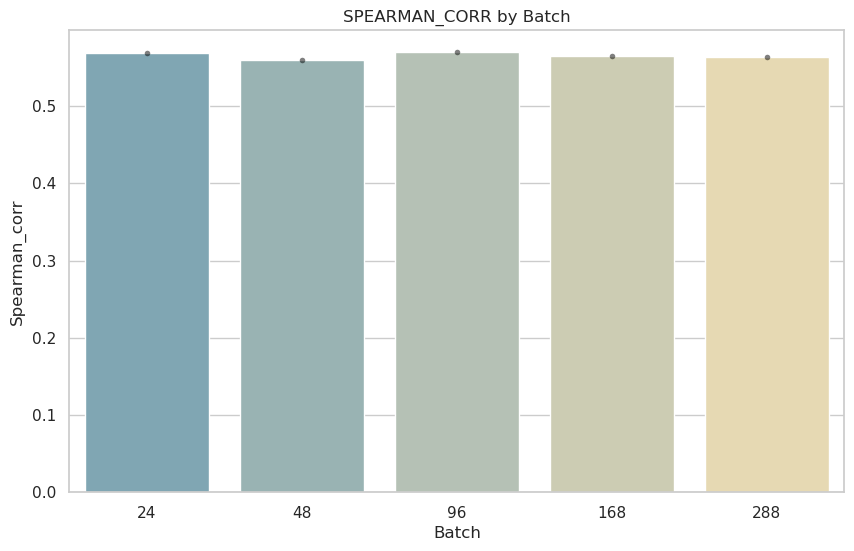

In [29]:
import pandas as pd

# Load data
df = pd.read_csv('/pmglocal/ty2514/Enhancer/Enhancer/results/DanQ_R_Square_scale_0_1.csv')

# Remove rows where r2 is less than 0.05
df_filtered = df[df['r2'] >= 0.05]
print(f"df {len(df)}, df_filtered {len(df_filtered)}")
# Define the metrics
metrics = ['mse', 'rmse', 'mae', 'r2', 'pearson_corr', 'spearman_corr']

# This function returns the best lr for each metric
def best_lr_for_metric(group, metric):
    mean_scores = group.groupby('lr')[metric].mean()
    return mean_scores.idxmax()

# Apply the function for each batch for each metric
best_lrs = {metric: df_filtered.groupby('batch').apply(best_lr_for_metric, metric) for metric in metrics}

# Prepare the data for plotting - select rows according to the best lr identified
plot_data = {}
for metric in metrics:
    plot_data[metric] = df_filtered[df_filtered.apply(lambda x: x['lr'] == best_lrs[metric][x['batch']], axis=1)]
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")
bar_color = 'skyblue' 
# Create a separate plot for each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=plot_data[metric], x='batch', y=metric, ci=None, estimator=np.mean, palette='blend:#7AB,#EDA')
    sns.stripplot(data=plot_data[metric], x='batch', y=metric, color='black', jitter=0.2, size=4, alpha=0.5)
    
    plt.title(f'{metric.upper()} by Batch')
    plt.xlabel('Batch')
    plt.ylabel(metric.capitalize())
    plt.show()
